<a href="https://colab.research.google.com/github/rishika-p/-NNDL-/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from random import shuffle
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
data = pd.read_csv("/content/kc_house_data.csv")
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
data.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

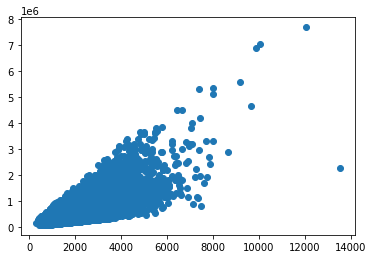

In [16]:
x = data['sqft_living']
y = data['price']
plt.scatter(data['sqft_living'],data['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


'sns.boxplot(y)'

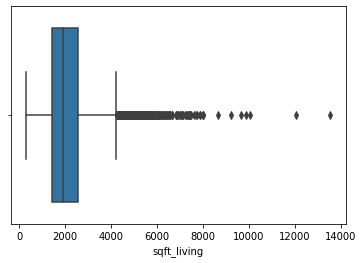

In [17]:
sns.boxplot(x)
"sns.boxplot(y)"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


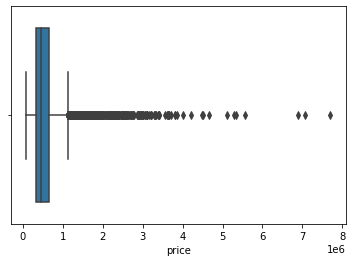

In [18]:
sns.boxplot(y)

In [19]:
x = list(x)
y = list(y)
x_new = []
y_new = []
z = np.abs(stats.zscore(x))
outliers = np.where(z > 3)
for i in range(len(x)):
  if i not in outliers[0]:
    x_new.append(x[i])
    y_new.append(y[i])


In [20]:
print(len(x_new))
print(len(y_new))

21365
21365


In [22]:
x = x_new
y = y_new

In [25]:
x = minmax_scale(x)
y = minmax_scale(y)
cd_d = [(x[i],y[i]) for i in range(len(x))]
cd_train_d, cd_test_d = train_test_split(cd_d,test_size=0.1)
print(len(cd_train_d))
print(len(cd_test_d))

19228
2137


In [29]:
m=1
c=1
learning_rate = 0.01
epochs = 12
batch_size = 270
number_of_samples = len(cd_train_d)
number_of_batches = number_of_samples//batch_size
def gradient_of_m(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)*d[i][0]
  return -1*sum/len(d)
def gradient_of_c(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)
  return -1*sum/len(d)
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum += math.pow(d[i][1]-m*d[i][0]-c,2)
  return (1/2)*(1/len(d))*sum

In [46]:
error_list = []
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = cd_train_d[j*batch_size:]
    else:
      d = cd_train_d[j*batch_size:(j+1)*batch_size]
    delta_m = -1*learning_rate*gradient_of_m(d,m,c)
    delta_c = -1*learning_rate*gradient_of_c(d,m,c)
    m = m + delta_m
    c = c + delta_c
    err = error(d,m,c)
    print("error is {}".format(err))
    error_list.append(err)
  random.shuffle(cd_train_d)

error is 0.0027022309734533833
error is 0.002130142598673634
error is 0.002294136198845218
error is 0.0023479718993083378
error is 0.001911632566395392
error is 0.0025704661882837688
error is 0.003037635313490469
error is 0.0021123777014625533
error is 0.0020107036896349277
error is 0.0015978156064280502
error is 0.0018343890120804723
error is 0.0019626292894601373
error is 0.0025694530663212785
error is 0.0019194027900632708
error is 0.002172605814618592
error is 0.001993712876801213
error is 0.001779137581742711
error is 0.0034383449542885005
error is 0.0031936945668898874
error is 0.002040799061888254
error is 0.001638272372420723
error is 0.0027613264223705775
error is 0.0019909333927804512
error is 0.0021669691441259156
error is 0.0027464525245852957
error is 0.002286027513864867
error is 0.0015395483086140661
error is 0.001989407516661046
error is 0.0020011683521266982
error is 0.0025144045362710866
error is 0.0024058516211625134
error is 0.0020911838730752774
error is 0.00267041

In [39]:
tr_err = error(cd_train_d,m,c)
te_err = error(cd_test_d,m,c)
print("training->error : ",tr_err)
print("test->error : ",te_err)

training->error :  0.0023046083944401313
test->error :  0.002413337106426376


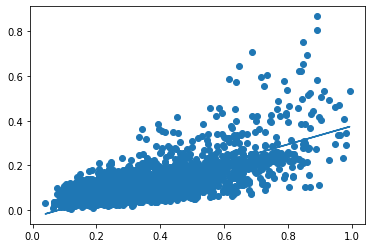

In [38]:
x_1 = [a[0] for a in cd_test_d]
y_1 = [a[1] for a in cd_test_d]
x_2 = [a[0] for a in cd_test_d]
y_2 = [m*i+c for i in x_2]
plt.scatter(x_1,y_1)
plt.plot(x_2,y_2)

In [45]:
area = int(input("enter area : "))
maximum_p = 7.700000e+06
minimum_p = 7.500000e+04
maximum_area = 13540.000000
minimum_area = 290.000000
area = (area - minimum_area)/(maximum_area-minimum_area)
op_p = area*m+c
op_p = op_p*(maximum_p-minimum_p)+minimum_p
print("predicted price of house is : ",op_p)

enter area : 2021
predicted price of house is :  232421.19893333883
